# 02 - Classificando patologias em toras usando combinação de `OTSU_threshold + LBP + SVM`

## Importando bibliotecas

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from zipfile import ZipFile
from skimage import io
from skimage.filters import threshold_otsu
from skimage.feature import local_binary_pattern

sns.set()
plt.gray()

# Parâmetros do LBP
METHOD = 'nri_uniform'
RADIUS = 1
N_POINTS = 8

TARGET_NAMES = {'normal': 0,
                'broca':1,
                'fissura': 2,
                'musgo': 3}

<Figure size 432x288 with 0 Axes>

## Processando imagens

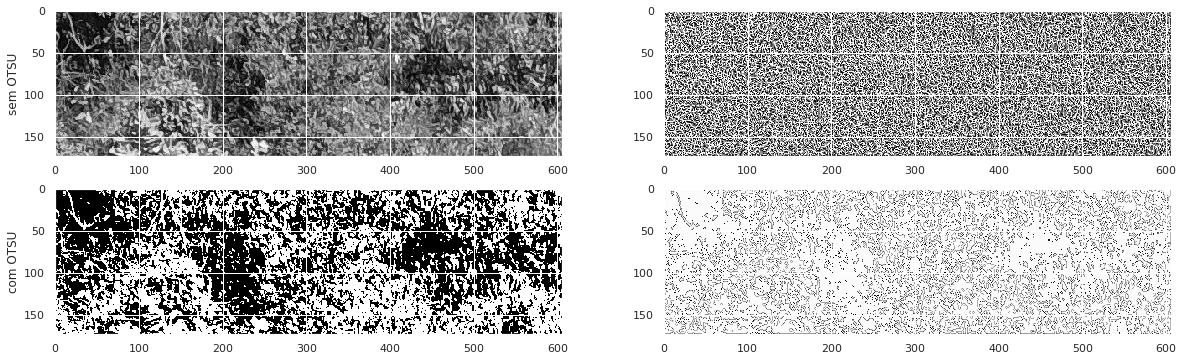

No handles with labels found to put in legend.


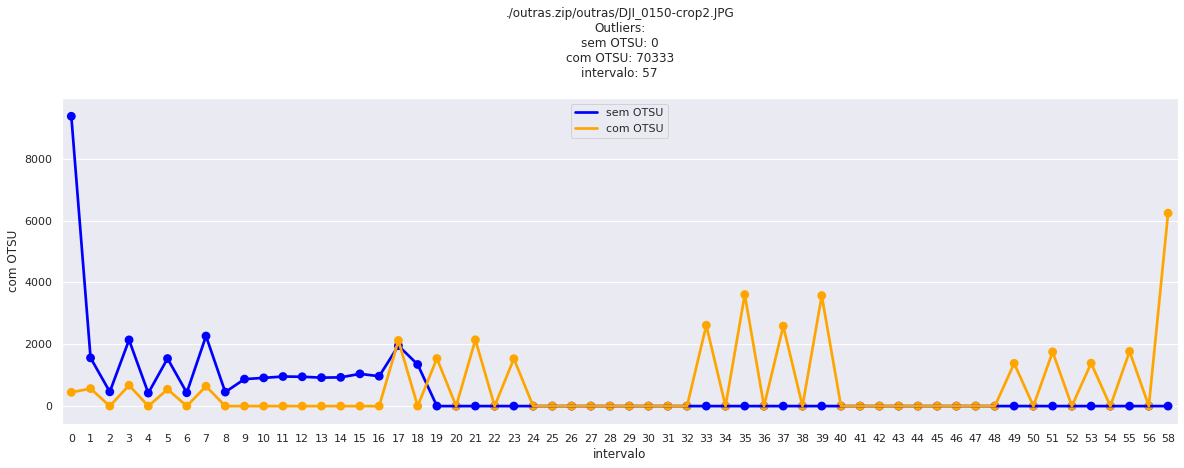

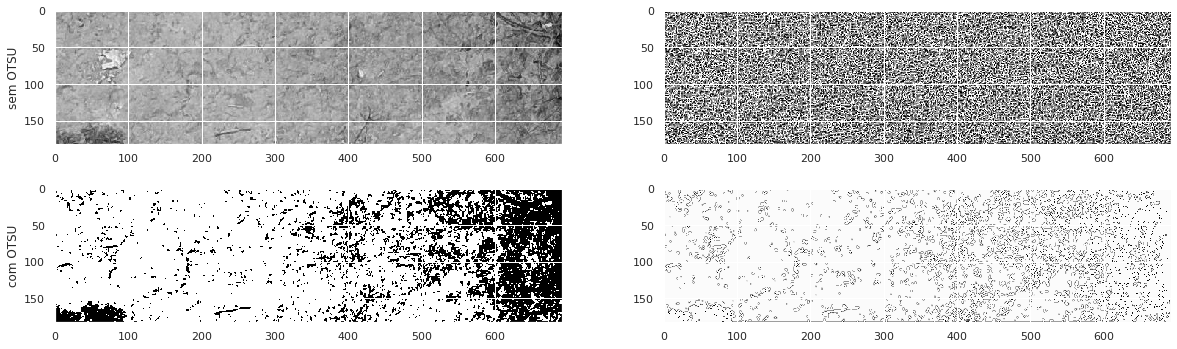

No handles with labels found to put in legend.


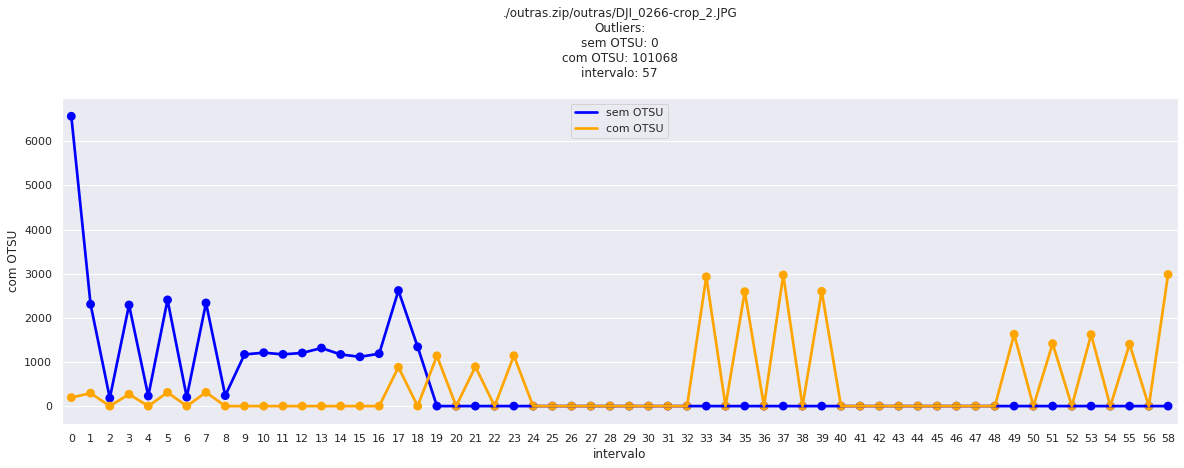

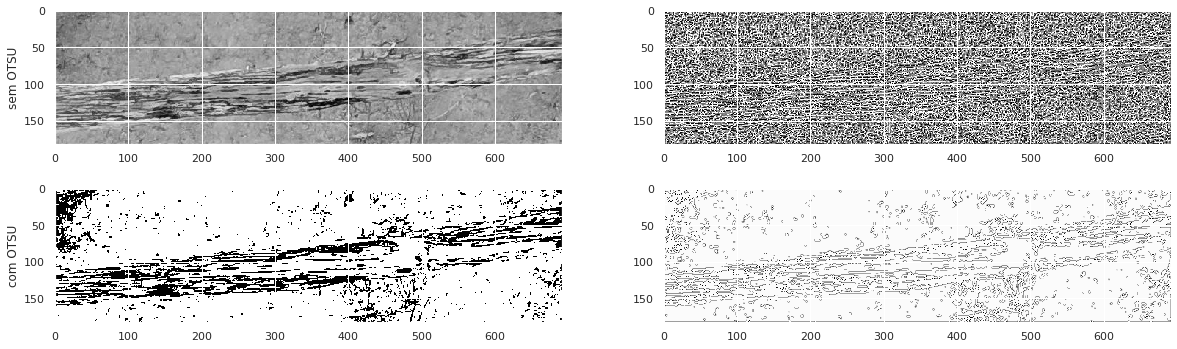

No handles with labels found to put in legend.


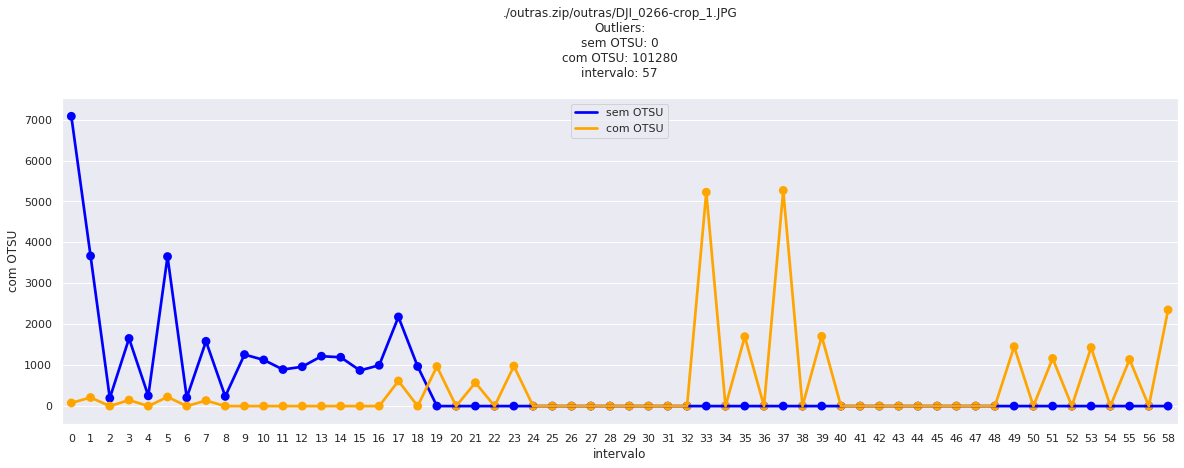

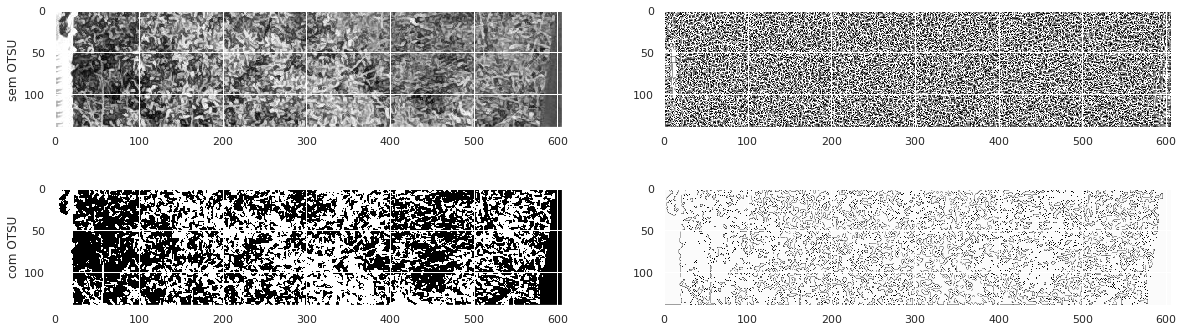

No handles with labels found to put in legend.


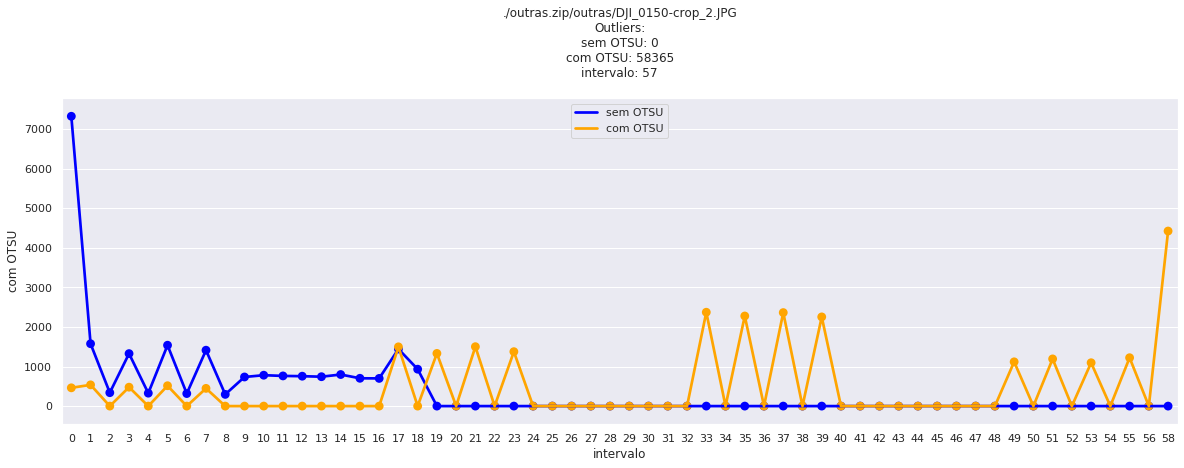

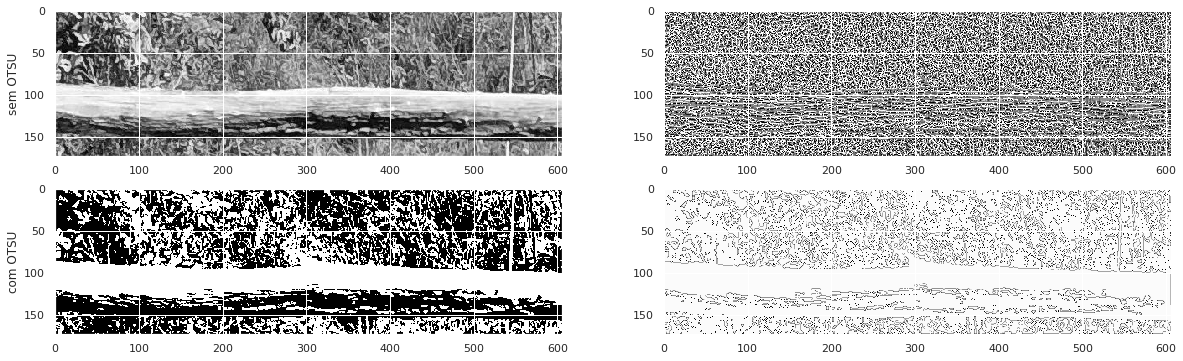

No handles with labels found to put in legend.


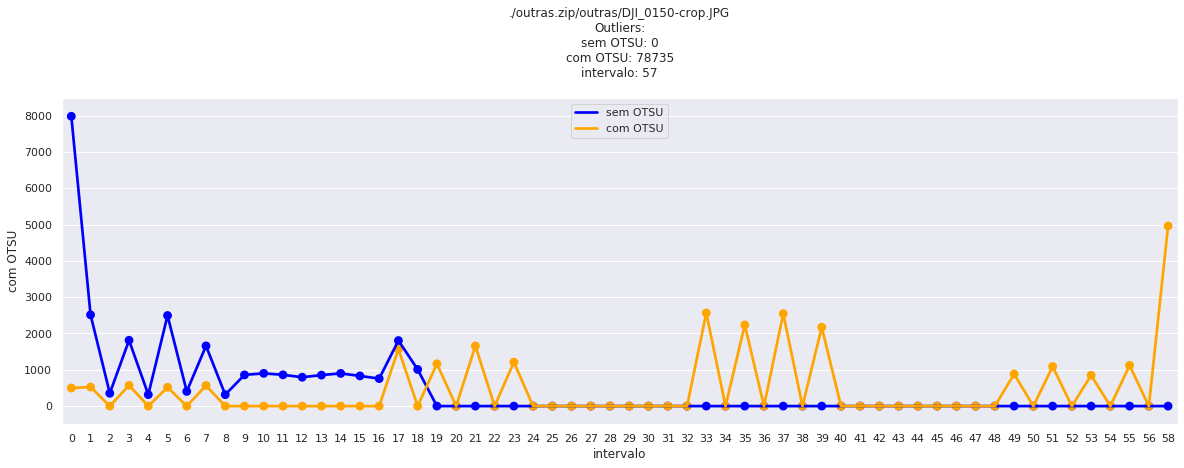

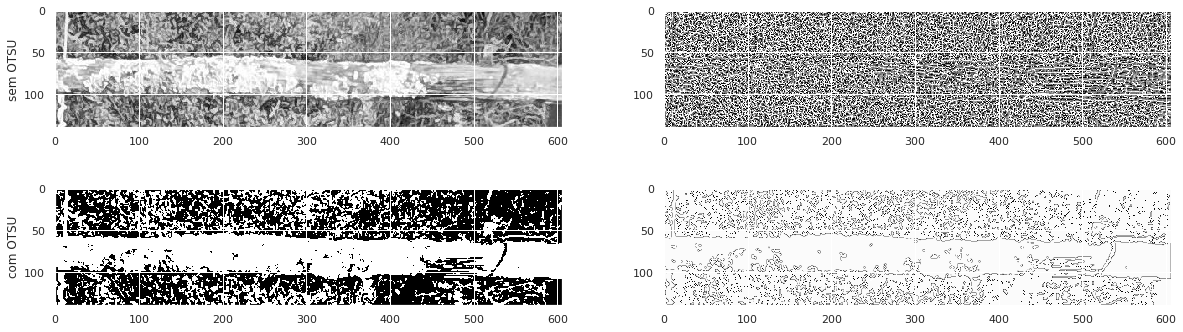

No handles with labels found to put in legend.


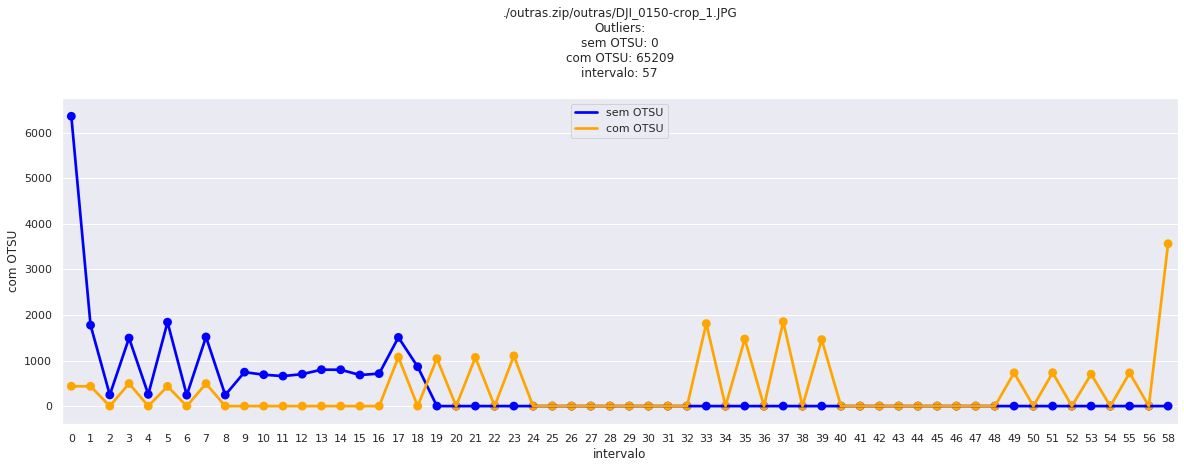

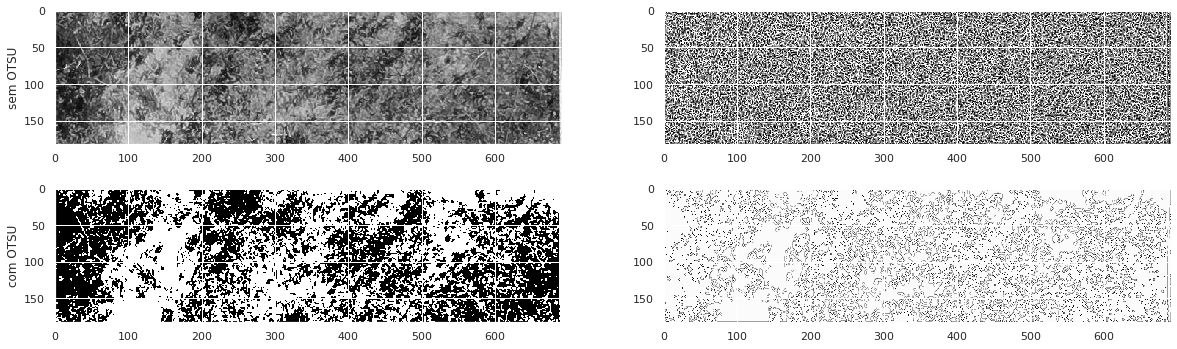

No handles with labels found to put in legend.


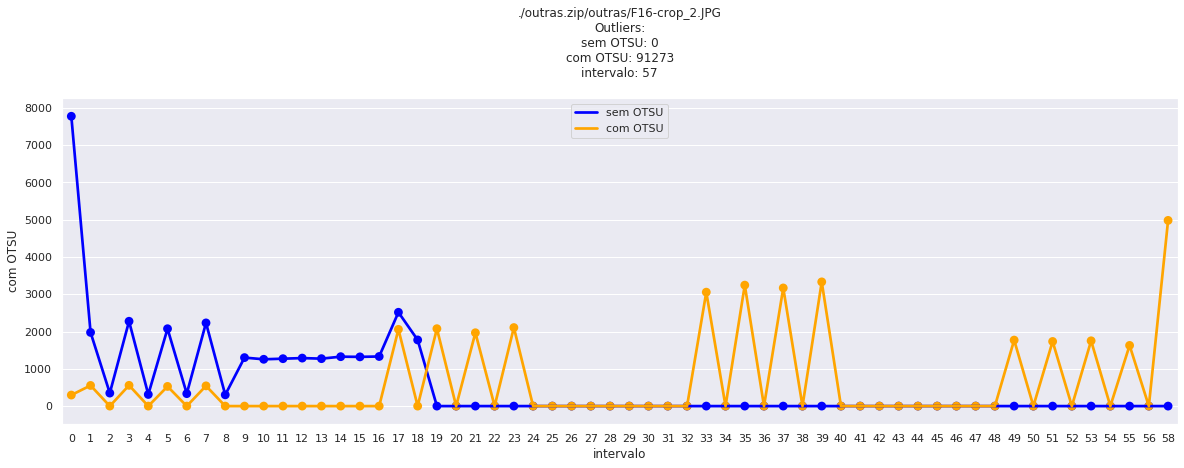

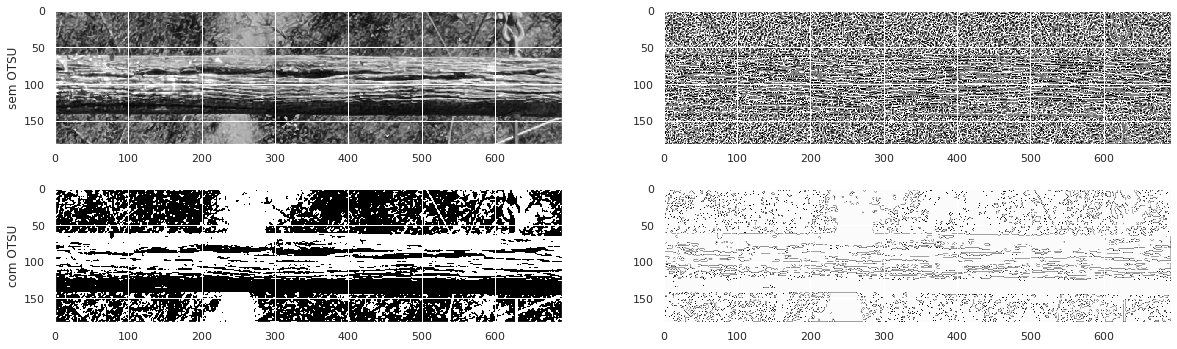

No handles with labels found to put in legend.


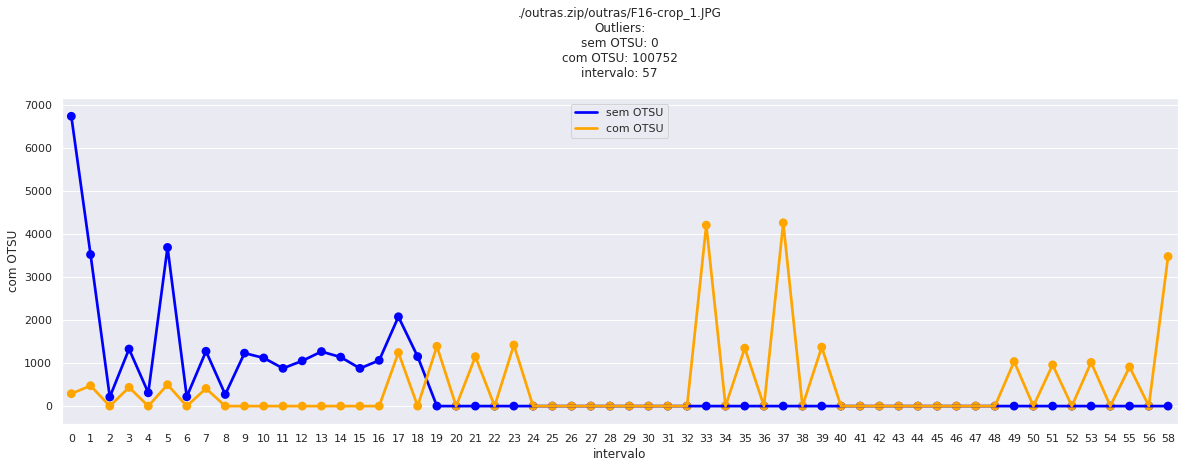

In [7]:
# path_dict = {name: [] for name in TARGET_NAMES}
path_list = []

with ZipFile('./outras.zip') as zip_file:
  for path in zip_file.namelist():
    # a pasta de cada amostra é o segundo elemento do split
    if '__MAC' not in path and '.JPG' in path:
      path_list.append(f'./outras.zip/{path}')


# path_list = ['./img/DJI_0150-crop.JPG', './img/DJI_0150-crop2.JPG']


for path in path_list:
  img = io.imread(path, as_gray=True)
  lbp = local_binary_pattern(image=img, P=N_POINTS, R=RADIUS, method=METHOD)

  img_otsu = img >= threshold_otsu(img)
  lbp_otsu = local_binary_pattern(image=img_otsu, P=N_POINTS, R=RADIUS, method=METHOD)
  
  hist = pd.Series(lbp.flatten()).value_counts().sort_index()
  hist_otsu = pd.Series(lbp_otsu.flatten()).value_counts().sort_index()
  
  arr = np.zeros(59)
  arr_otsu = np.zeros(59)
  
  for i, j in zip(hist.index, hist_otsu.index):
    arr[int(i)] = hist[i]
    arr_otsu[int(j)] = hist_otsu[j]
  
  df = pd.DataFrame(
    data=[arr, arr_otsu],
    index=['sem OTSU', 'com OTSU'],
    dtype=int).transpose()
  df['intervalo'] = range(len(df))
  df = df.transpose()
  
  # parte com outliers distorcendo o pointplot
  df_outlier = df.pop(57)
  df = df.transpose() 
  
  # FIGURA 1
  fig1, ax1 = plt.subplots(nrows=2, ncols=2, figsize=(20, 6))
  
  ax1[0, 0].set_ylabel('sem OTSU')
  ax1[0, 0].imshow(img)
  ax1[0, 1].imshow(lbp)

  ax1[1, 0].set_ylabel('com OTSU')
  ax1[1, 0].imshow(img_otsu)
  ax1[1, 1].imshow(lbp_otsu)
  plt.show()

  # FIGURA 2
  fig2, ax2 = plt.subplots(figsize=(20, 6))
  sns.pointplot(
    data=df,
    x='intervalo',
    y='sem OTSU',
    ax=ax2,
    color='blue',
    label='sem OTSU')
  sns.pointplot(
    data=df,
    x='intervalo',
    y='com OTSU',
    ax=ax2,
    color='orange',
    label='com OTSU').legend()
  
  titulo = str().join([f'{i}: {v}\n' for i, v in zip(df_outlier.index, df_outlier.values)])
  ax2.title.set_text(f'{path}\nOutliers:\n{titulo}')

  ax2.legend(['sem OTSU', 'com OTSU'], loc='upper center')
  leg = ax2.get_legend()
  leg.legendHandles[0].set_color('blue')
  leg.legendHandles[1].set_color('orange')
  plt.show()
